In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.neighbors import KNeighborsClassifier



# data importing

In [3]:
# importing csv files
# column 0 in csv file has no bussiness meaning 

polisot= pd.read_csv('Polisot.csv',usecols = [1,2,3,4,5,6],parse_dates=[4,5])

tviot = pd.read_csv('Tviot.csv',index_col=0, usecols = [1,2,3],parse_dates=[2])

customers = pd.read_csv('Customers.csv',usecols = [1,2,3,4,5,6] ,index_col=4)

# preprocessing

In [4]:
# deal with car company nulls

# check to see the values 
polisot.Rechecv_Companny.unique()

# fill null with value //  can deduce the type of car by licence plate for real plates
polisot.Rechecv_Companny.fillna('Unknown', inplace=True)

In [5]:
# assign category type 

polisot['Rechecv_Companny'] = polisot['Rechecv_Companny'].astype('category')



# manufacture year 0 to mean  

#polisot['Manufacture_Year'] = polisot['Manufacture_Year'].replace(0,polisot['Manufacture_Year'][polisot['Manufacture_Year']>1980].mean())

# replace year =0 with mean for every car type

def man_year(rechev,manyear):
    if manyear >1980 :
        return manyear
    else :
        return polisot['Manufacture_Year'][(polisot['Rechecv_Companny']==rechev) & (polisot['Manufacture_Year']>1980)].mean()

polisot['Manufacture_Year'] = polisot.apply(lambda x: man_year(x['Rechecv_Companny'],x['Manufacture_Year']),axis=1  )





In [6]:
# rearrange columns order

cols = [ 'Rishuy_number','Keypls', 'Rechecv_Companny', 'Manufacture_Year',
       'Start_date', 'End_date']

polisot = polisot[cols]

polisot.head()

,Rishuy_number,Keypls,Rechecv_Companny,Manufacture_Year,Start_date,End_date
0,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03
1,73002501,1001,Fiat,2006.000000,2016-04-08,2017-04-08
2,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11
3,73002503,1003,Mazda,2010.000000,2016-04-08,2017-04-08
4,73002504,1004,Fiat,2008.000000,2016-01-01,2016-12-31


In [7]:
tviot.info()
tviot.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 1002 to 5000
Data columns (total 2 columns):
Tvia_number    711 non-null int64
Tvia_date      711 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.7 KB


,Tvia_number,Tvia_date
Keypls,,
1002,4,2016-11-11
1004,16,2016-11-29
1020,400,2016-05-02
1033,1089,2016-07-08
1046,2116,2016-06-24


In [8]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2198 to 1501
Data columns (total 5 columns):
ID                    8000 non-null int64
Age                   8000 non-null int64
Gender                8000 non-null object
City                  8000 non-null object
Meshlem_polisa_IND    8000 non-null int64
dtypes: int64(3), object(2)
memory usage: 375.0+ KB


,ID,Age,Gender,City,Meshlem_polisa_IND
Keypls,,,,,
2198,300600900,39,Male,Tel Aviv,0
1152,300600901,44,Male,Jerusalem,0
4990,300600902,43,Female,Tel Aviv,0
1543,300600903,57,Female,Jerusalem,0
3704,300600904,21,Male,Ashdod,0


In [9]:
# find if there is nulls in data and if there  is where and how many

def findnulls(X):
    
    print("nulls in data : " ,X.isnull().values.any())
    nulls = X.isnull().sum()
    print(nulls[nulls > 0])
    print("=====")
    
findnulls(polisot)
findnulls(tviot)
findnulls(customers)

nulls in data :  False
Series([], dtype: int64)
=====
nulls in data :  False
Series([], dtype: int64)
=====
nulls in data :  False
Series([], dtype: int64)
=====


# visualization

In [10]:
def show_hist(X,size=(10, 10)):
    X.hist(figsize = size)
    plt.show()

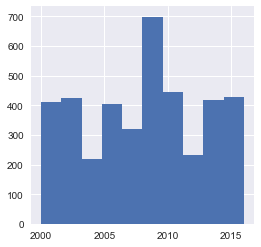

In [11]:
# polisot 
show_hist(polisot['Manufacture_Year'],size=(4,4))

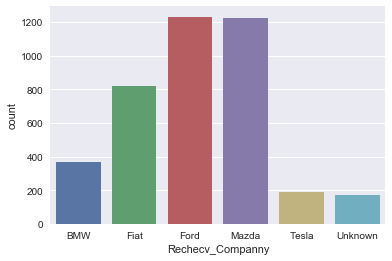

In [12]:
# car by company in polisot
ax = sns.countplot(x="Rechecv_Companny", data=polisot)

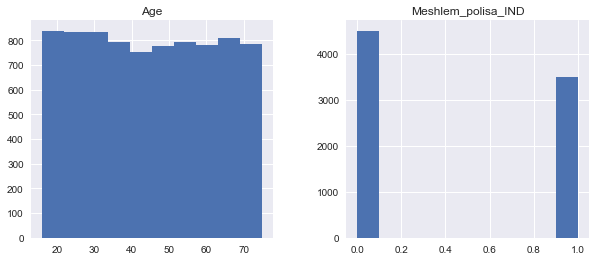

In [13]:
#customers
show_hist(customers.drop('ID',axis=1),size=(10,4))

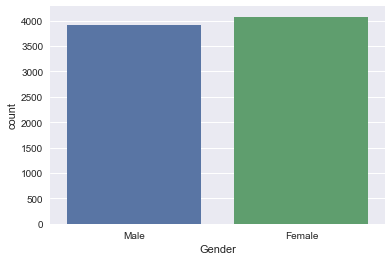

In [14]:
# customers gender 
ax = sns.countplot(x="Gender", data=customers)

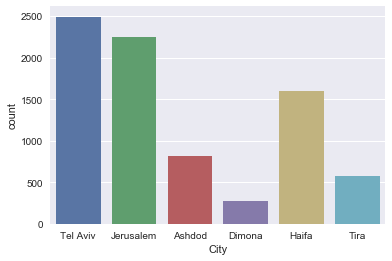

In [15]:
# customers city 
ax = sns.countplot(x="City", data=customers)

# model 1 

In [16]:
per_car = polisot.merge(tviot, how='left', on='Keypls' )


In [17]:
print(polisot.shape)
print(tviot.shape)
print(per_car.shape)

(4001, 6)
(711, 2)
(4001, 8)


In [18]:
findnulls(per_car)


nulls in data :  True
Tvia_number    3290
Tvia_date      3290
dtype: int64
=====


In [19]:
per_car.head()

,Rishuy_number,Keypls,Rechecv_Companny,Manufacture_Year,Start_date,End_date,Tvia_number,Tvia_date
0,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,NaN,NaT
1,73002501,1001,Fiat,2006.000000,2016-04-08,2017-04-08,NaN,NaT
2,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,4.0,2016-11-11
3,73002503,1003,Mazda,2010.000000,2016-04-08,2017-04-08,NaN,NaT
4,73002504,1004,Fiat,2008.000000,2016-01-01,2016-12-31,16.0,2016-11-29


In [20]:
# new feature ins length 

per_car['ins_length'] =(per_car['End_date']-per_car['Start_date']).dt.days

# new feature :  accident timing  - 0 is first day of insurance start , 1 is last day

#per_car['tvia_time'] =((per_car['End_date']-per_car['Tvia_date']).dt.days / per_car['ins_length'])

per_car['accident'] = np.where(per_car['Tvia_number'].isnull(), 0, 1)

# fill default time for na values

#per_car['Tvia_date'].fillna(value=pd.to_datetime('1/1/1900'), inplace=True) 

# fill na values with 0 

per_car.Tvia_number.fillna(0,inplace=True)
#per_car.tvia_time.fillna(0,inplace=True)

In [21]:
per_car.head()

,Rishuy_number,Keypls,Rechecv_Companny,Manufacture_Year,Start_date,End_date,Tvia_number,Tvia_date,ins_length,accident
0,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,0.0,NaT,365,0
1,73002501,1001,Fiat,2006.000000,2016-04-08,2017-04-08,0.0,NaT,365,0
2,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,4.0,2016-11-11,365,1
3,73002503,1003,Mazda,2010.000000,2016-04-08,2017-04-08,0.0,NaT,365,0
4,73002504,1004,Fiat,2008.000000,2016-01-01,2016-12-31,16.0,2016-11-29,365,1


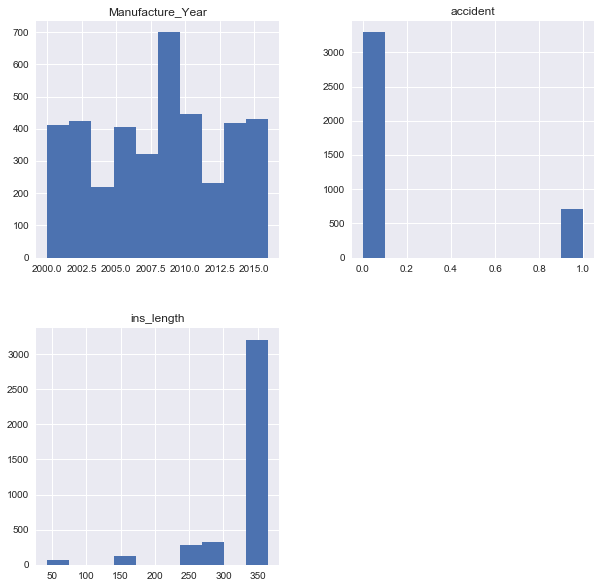

In [22]:
show_hist(per_car[['accident','ins_length','Manufacture_Year']])

In [23]:
per_car.columns


Index(['Rishuy_number', 'Keypls', 'Rechecv_Companny', 'Manufacture_Year',
       'Start_date', 'End_date', 'Tvia_number', 'Tvia_date', 'ins_length',
       'accident'],
      dtype='object')

In [24]:
# select the relevant feature columns

fcols = [ 'Keypls', 'Rechecv_Companny', 'Manufacture_Year'
        , 'ins_length'
       ]

In [25]:
# create features and labels 

y = per_car.accident
X = per_car[fcols].set_index('Keypls')

In [26]:
# car company is categorical column . we nead to convert to bolean columns 

X = pd.get_dummies(X)

In [27]:
X.head()

,Manufacture_Year,ins_length,Rechecv_Companny_BMW,Rechecv_Companny_Fiat,Rechecv_Companny_Ford,Rechecv_Companny_Mazda,Rechecv_Companny_Tesla,Rechecv_Companny_Unknown
Keypls,,,,,,,,
1000,2008.175663,365,0,0,0,1,0,0
1001,2006.000000,365,0,1,0,0,0,0
1002,2000.000000,365,0,0,0,1,0,0
1003,2010.000000,365,0,0,0,1,0,0
1004,2008.000000,365,0,1,0,0,0,0


In [28]:
#split data to test and train set to check the model 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=27)


# knn

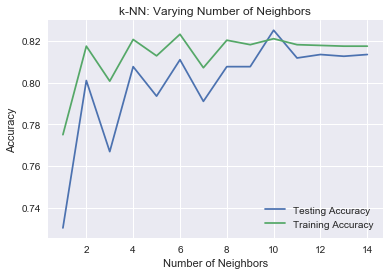

In [29]:

neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
knn  = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test, y_test))

target_names = ['no accident', 'accident']

print(classification_report(y_test, y_pred, target_names=target_names))

0.8109908409658618
             precision    recall  f1-score   support

no accident       0.83      0.97      0.89       991
   accident       0.24      0.04      0.07       210

avg / total       0.72      0.81      0.75      1201



# random forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

#predict test set result
y_pred = RF.predict(X_test)

target_names = ['no accident', 'accident']

print(classification_report(y_test, y_pred, target_names=target_names))


             precision    recall  f1-score   support

no accident       0.83      0.96      0.89       991
   accident       0.23      0.05      0.09       210

avg / total       0.72      0.80      0.75      1201



# NAIVE BAYES

In [32]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

no accident       0.86      0.70      0.77       991
   accident       0.25      0.46      0.32       210

avg / total       0.75      0.66      0.70      1201



# model 2 

## with customers data 

In [33]:
per_car = polisot.merge(tviot, how='left', on='Keypls' )
per_car['ins_length'] =(per_car['End_date']-per_car['Start_date']).dt.days
per_car['accident'] = np.where(per_car['Tvia_number'].isnull(), 0, 1)


In [34]:
per_car = per_car.drop(['Tvia_date','Tvia_number'],axis = 1 )

In [35]:
per_car.head()

,Rishuy_number,Keypls,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ins_length,accident
0,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,365,0
1,73002501,1001,Fiat,2006.000000,2016-04-08,2017-04-08,365,0
2,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,365,1
3,73002503,1003,Mazda,2010.000000,2016-04-08,2017-04-08,365,0
4,73002504,1004,Fiat,2008.000000,2016-01-01,2016-12-31,365,1


In [36]:
## join costumers info to per_car data to a combined data 

c = per_car.merge(customers, how='left', on='Keypls' )

# preprocessing

In [37]:
# make categorical columns categorical 
categorical_cols=['Gender','City']
c[categorical_cols] = c[categorical_cols].astype('category')

In [38]:
c.head(8)

,Rishuy_number,Keypls,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ins_length,accident,ID,Age,Gender,City,Meshlem_polisa_IND
0,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,365,0,300606479.0,26.0,Male,Jerusalem,0.0
1,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,365,0,300607701.0,75.0,Male,Tel Aviv,1.0
2,73002501,1001,Fiat,2006.000000,2016-04-08,2017-04-08,365,0,300606662.0,47.0,Female,Haifa,0.0
3,73002501,1001,Fiat,2006.000000,2016-04-08,2017-04-08,365,0,300606907.0,18.0,Female,Jerusalem,1.0
4,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,365,1,300601754.0,25.0,Female,Tel Aviv,0.0
5,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,365,1,300602172.0,32.0,Female,Ashdod,0.0
6,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,365,1,300603573.0,52.0,Female,Tel Aviv,0.0
7,73002502,1002,Mazda,2000.000000,2016-11-11,2017-11-11,365,1,300605775.0,33.0,Female,Tel Aviv,0.0


In [41]:
print(customers.shape)
print(per_car.shape)
print(c.shape)

(8000, 5)
(4001, 8)
(8000, 13)


In [42]:
findnulls(c)
c= c.dropna()

# fill na with meshalem = 1 , age =mean , id= -1 , gender = 


#customers.sort_values(by='Keypls')

nulls in data :  False
Series([], dtype: int64)
=====


# city

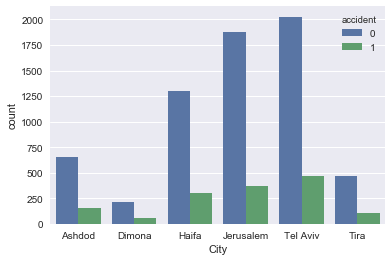

In [43]:
# count of accidents and no accidents by city

accidents_by_city = c.filter(items=['Keypls','City','accident']).set_index('Keypls')
ax = sns.countplot(x="City", data=accidents_by_city,hue="accident")

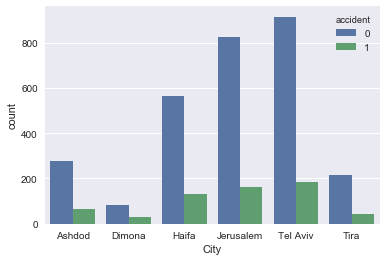

In [44]:
# count accidents by city of payer of the insurance

polisa_payer = c[c['Meshlem_polisa_IND']==1]

polisa_payer_city = polisa_payer.filter(items=['Keypls','City','accident'])

ax = sns.countplot(x="City", data=polisa_payer_city,hue="accident")

In [45]:
# make dummies out of cities and sum of members cities

cities = c[['Keypls','City']].set_index('Keypls')
cities = pd.get_dummies(cities)
cities = cities.groupby('Keypls').sum()

#add polisa payer city

cities['payer_city'] = c[c['Meshlem_polisa_IND']==1].set_index('Keypls')[['City']]

cities.head()


,City_Ashdod,City_Dimona,City_Haifa,City_Jerusalem,City_Tel Aviv,City_Tira,payer_city
Keypls,,,,,,,
1000,0,0,0,1,1,0,Tel Aviv
1001,0,0,1,1,0,0,Jerusalem
1002,2,1,0,0,3,0,Ashdod
1003,0,0,1,0,0,0,Haifa
1004,0,0,0,1,0,0,Jerusalem


# Gender 

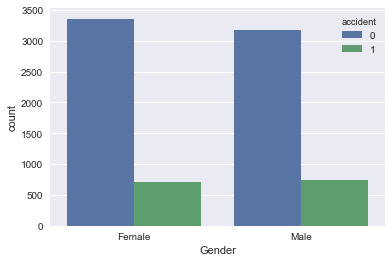

In [46]:
# count of accidents and no accidents by Gender


accidents_by_gender = c.filter(items=['Keypls','Gender','accident']).set_index('Keypls')
#sns.set(style="darkgrid")

ax = sns.countplot(x="Gender", data=accidents_by_gender,hue="accident")

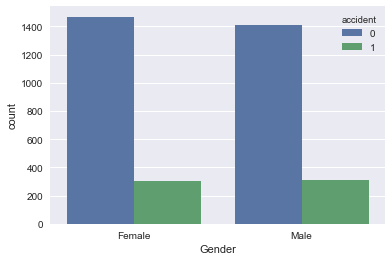

In [47]:
## count accidents by gender of the  payer of the insurance

polisa_payer = c[c['Meshlem_polisa_IND']==1]

polisa_payer_gender = polisa_payer.filter(items=['Keypls','Gender','accident'])

ax = sns.countplot(x="Gender", data=polisa_payer_gender,hue="accident")

In [48]:
# gender

gender = c[['Keypls','Gender']].set_index('Keypls')
gender = pd.get_dummies(gender)
gender = gender.groupby('Keypls').sum()

#add polisa payer gender

gender['payer_gender'] = c[c['Meshlem_polisa_IND']==1].set_index('Keypls')[['Gender']]
gender.head()

,Gender_Female,Gender_Male,payer_gender
Keypls,,,
1000,0,2,Male
1001,2,0,Female
1002,6,0,Female
1003,0,1,Male
1004,1,0,Female


# age

In [49]:
ages = pd.DataFrame()



ages['min_age'] = c.groupby('Keypls')['Age'].min()
ages['max_age'] = c.groupby('Keypls')['Age'].max()
ages['sum_age'] = c.groupby('Keypls')['Age'].sum()


ages['mean_age'] = c.groupby('Keypls')['Age'].mean()
ages['count_age'] = c.groupby('Keypls')['Age'].count()


#ages['weighted_age'] = (ages['sum_age']+ages['mean_age']/((1+(ages['max_age']+ages['min_age'])) * ages['count_age']*3 ) )
ages['weighted_age'] = ((ages['mean_age']))/(1+ages['max_age']-ages['min_age'])*((ages['count_age'])**0.5)*(1+ages['max_age']-ages['min_age'])

# polisa payer age 
ages['payer_age'] = c[c['Meshlem_polisa_IND']==1].set_index('Keypls')[['Age']]

ages.head(10)

,min_age,max_age,sum_age,mean_age,count_age,weighted_age,payer_age
Keypls,,,,,,,
1000,26.0,75.0,101.0,50.500000,2,71.417785,75.0
1001,18.0,47.0,65.0,32.500000,2,45.961941,18.0
1002,25.0,52.0,227.0,37.833333,6,92.672362,41.0
1003,49.0,49.0,49.0,49.000000,1,49.000000,49.0
1004,58.0,58.0,58.0,58.000000,1,58.000000,58.0
1005,42.0,75.0,117.0,58.500000,2,82.731493,42.0
1006,36.0,61.0,97.0,48.500000,2,68.589358,36.0
1007,59.0,59.0,59.0,59.000000,1,59.000000,59.0
1009,57.0,57.0,57.0,57.000000,1,57.000000,57.0


In [50]:
ages.head()

,min_age,max_age,sum_age,mean_age,count_age,weighted_age,payer_age
Keypls,,,,,,,
1000,26.0,75.0,101.0,50.500000,2,71.417785,75.0
1001,18.0,47.0,65.0,32.500000,2,45.961941,18.0
1002,25.0,52.0,227.0,37.833333,6,92.672362,41.0
1003,49.0,49.0,49.0,49.000000,1,49.000000,49.0
1004,58.0,58.0,58.0,58.000000,1,58.000000,58.0


In [51]:
c.head(2)

,Rishuy_number,Keypls,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ins_length,accident,ID,Age,Gender,City,Meshlem_polisa_IND
0,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,365,0,300606479.0,26.0,Male,Jerusalem,0.0
1,73002500,1000,Mazda,2008.175663,2016-09-03,2017-09-03,365,0,300607701.0,75.0,Male,Tel Aviv,1.0


# merge 

In [52]:
# polisa data

pol = c[['Keypls','Rechecv_Companny','Manufacture_Year','ins_length','accident']][c['Meshlem_polisa_IND']==1].set_index('Keypls')
pol.head()

,Rechecv_Companny,Manufacture_Year,ins_length,accident
Keypls,,,,
1000,Mazda,2008.175663,365,0
1001,Fiat,2006.000000,365,0
1002,Mazda,2000.000000,365,1
1003,Mazda,2010.000000,365,0
1004,Fiat,2008.000000,365,1


In [53]:

data = cities.merge(gender,on='Keypls').merge(ages,on='Keypls').merge(pol,on='Keypls')
data.head(2)

,City_Ashdod,City_Dimona,City_Haifa,City_Jerusalem,City_Tel Aviv,City_Tira,payer_city,Gender_Female,Gender_Male,payer_gender,...,max_age,sum_age,mean_age,count_age,weighted_age,payer_age,Rechecv_Companny,Manufacture_Year,ins_length,accident
Keypls,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,1,1,0,Tel Aviv,0,2,Male,...,75.0,101.0,50.5,2,71.417785,75.0,Mazda,2008.175663,365,0
1001,0,0,1,1,0,0,Jerusalem,2,0,Female,...,47.0,65.0,32.5,2,45.961941,18.0,Fiat,2006.000000,365,0


In [54]:
# merge all
print(gender.shape)
print(cities.shape)
print(ages.shape)
print(pol.shape)
print(data.shape)


(3493, 3)
(3493, 7)
(3493, 7)
(3493, 4)
(3493, 21)


In [55]:
data.columns

Index(['City_Ashdod', 'City_Dimona', 'City_Haifa', 'City_Jerusalem',
       'City_Tel Aviv', 'City_Tira', 'payer_city', 'Gender_Female',
       'Gender_Male', 'payer_gender', 'min_age', 'max_age', 'sum_age',
       'mean_age', 'count_age', 'weighted_age', 'payer_age',
       'Rechecv_Companny', 'Manufacture_Year', 'ins_length', 'accident'],
      dtype='object')

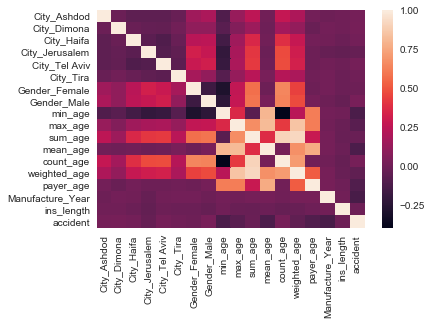

In [56]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [57]:
data.info()
data.columns
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1000 to 5000
Data columns (total 21 columns):
City_Ashdod         3493 non-null uint8
City_Dimona         3493 non-null uint8
City_Haifa          3493 non-null uint8
City_Jerusalem      3493 non-null uint8
City_Tel Aviv       3493 non-null uint8
City_Tira           3493 non-null uint8
payer_city          3493 non-null object
Gender_Female       3493 non-null uint8
Gender_Male         3493 non-null uint8
payer_gender        3493 non-null object
min_age             3493 non-null float64
max_age             3493 non-null float64
sum_age             3493 non-null float64
mean_age            3493 non-null float64
count_age           3493 non-null int64
weighted_age        3493 non-null float64
payer_age           3493 non-null float64
Rechecv_Companny    3493 non-null category
Manufacture_Year    3493 non-null float64
ins_length          3493 non-null int64
accident            3493 non-null int32
dtypes: category(1), float64(7)

,City_Ashdod,City_Dimona,City_Haifa,City_Jerusalem,City_Tel Aviv,City_Tira,payer_city,Gender_Female,Gender_Male,payer_gender,...,max_age,sum_age,mean_age,count_age,weighted_age,payer_age,Rechecv_Companny,Manufacture_Year,ins_length,accident
Keypls,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,1,1,0,Tel Aviv,0,2,Male,...,75.0,101.0,50.500000,2,71.417785,75.0,Mazda,2008.175663,365,0
1001,0,0,1,1,0,0,Jerusalem,2,0,Female,...,47.0,65.0,32.500000,2,45.961941,18.0,Fiat,2006.000000,365,0
1002,2,1,0,0,3,0,Ashdod,6,0,Female,...,52.0,227.0,37.833333,6,92.672362,41.0,Mazda,2000.000000,365,1
1003,0,0,1,0,0,0,Haifa,0,1,Male,...,49.0,49.0,49.000000,1,49.000000,49.0,Mazda,2010.000000,365,0
1004,0,0,0,1,0,0,Jerusalem,1,0,Female,...,58.0,58.0,58.000000,1,58.000000,58.0,Fiat,2008.000000,365,1


In [58]:
data.columns


Index(['City_Ashdod', 'City_Dimona', 'City_Haifa', 'City_Jerusalem',
       'City_Tel Aviv', 'City_Tira', 'payer_city', 'Gender_Female',
       'Gender_Male', 'payer_gender', 'min_age', 'max_age', 'sum_age',
       'mean_age', 'count_age', 'weighted_age', 'payer_age',
       'Rechecv_Companny', 'Manufacture_Year', 'ins_length', 'accident'],
      dtype='object')

In [59]:
cols = ['City_Ashdod', 'City_Dimona', 'City_Haifa', 'City_Jerusalem',
       'City_Tel Aviv', 'City_Tira',## 'payer_city', 
        'Gender_Female',
       'Gender_Male',## 'payer_gender', 'min_age', 'max_age', 'sum_age',
       'mean_age', 'count_age',## 'weighted_age', 'payer_age',
       'Rechecv_Companny', 'Manufacture_Year', 'ins_length', 'accident']

In [60]:
data = data[cols]

# model 

In [61]:
data.head()

,City_Ashdod,City_Dimona,City_Haifa,City_Jerusalem,City_Tel Aviv,City_Tira,Gender_Female,Gender_Male,mean_age,count_age,Rechecv_Companny,Manufacture_Year,ins_length,accident
Keypls,,,,,,,,,,,,,,
1000,0,0,0,1,1,0,0,2,50.500000,2,Mazda,2008.175663,365,0
1001,0,0,1,1,0,0,2,0,32.500000,2,Fiat,2006.000000,365,0
1002,2,1,0,0,3,0,6,0,37.833333,6,Mazda,2000.000000,365,1
1003,0,0,1,0,0,0,0,1,49.000000,1,Mazda,2010.000000,365,0
1004,0,0,0,1,0,0,1,0,58.000000,1,Fiat,2008.000000,365,1


In [62]:

findnulls(data)

#data = data.dropna()




#X.fillna(0,inplace=True)


nulls in data :  False
Series([], dtype: int64)
=====


In [63]:
y = data.accident
X = data.drop(['accident'],axis=1)


y.head()
X.head()


,City_Ashdod,City_Dimona,City_Haifa,City_Jerusalem,City_Tel Aviv,City_Tira,Gender_Female,Gender_Male,mean_age,count_age,Rechecv_Companny,Manufacture_Year,ins_length
Keypls,,,,,,,,,,,,,
1000,0,0,0,1,1,0,0,2,50.500000,2,Mazda,2008.175663,365
1001,0,0,1,1,0,0,2,0,32.500000,2,Fiat,2006.000000,365
1002,2,1,0,0,3,0,6,0,37.833333,6,Mazda,2000.000000,365
1003,0,0,1,0,0,0,0,1,49.000000,1,Mazda,2010.000000,365
1004,0,0,0,1,0,0,1,0,58.000000,1,Fiat,2008.000000,365


In [64]:
# create dummies

X = pd.get_dummies(X)

#split data to test and train set to check the model 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=27)


# knn

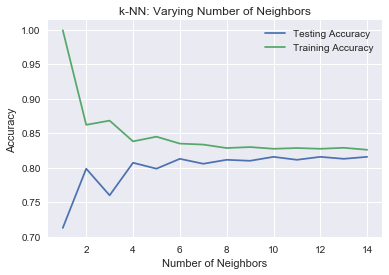

In [209]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [210]:
knn  = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test, y_test))


0.8068669527896996


In [211]:
target_names = ['no accident', 'accident']

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

no accident       0.82      0.98      0.89       571
   accident       0.23      0.02      0.04       128

avg / total       0.71      0.81      0.74       699



In [ ]:
"""


no accident       0.82      0.97      0.89       571
   accident       0.12      0.02      0.03       128

avg / total       0.69      0.80      0.73       699
"""

# rndm frst

In [212]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

#predict test set result
y_pred = RF.predict(X_test)


target_names = ['no accident', 'accident']

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

no accident       0.83      0.96      0.89       571
   accident       0.41      0.12      0.18       128

avg / total       0.75      0.81      0.76       699



In [ ]:
"""

# only age 



no accident       0.83      0.96      0.89       571
   accident       0.34      0.10      0.16       128

avg / total       0.74      0.80      0.75       69


age gender city

no accident       0.82      0.97      0.89       571
   accident       0.32      0.06      0.10       128

avg / total       0.73      0.80      0.75       699
"""

# boosted xtreme gradient

In [213]:
import xgboost as xgb

clf = xgb.XGBClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

no accident       0.82      0.99      0.90       571
   accident       0.00      0.00      0.00       128

avg / total       0.67      0.81      0.73       699



C:\Users\python\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# NAIVE BAYES

In [214]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

no accident       0.85      0.80      0.83       571
   accident       0.30      0.39      0.34       128

avg / total       0.75      0.72      0.74       699



In [ ]:
"""
no accident       0.86      0.78      0.82       571
   accident       0.31      0.42      0.35       128

avg / total       0.76      0.72      0.73       699



"""

# SVM

In [66]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#fitting logistic regression to the training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',
                 random_state = 0)
classifier.fit(X_train, y_train)

#predict test set result
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

no accident       0.82      1.00      0.90       571
   accident       0.00      0.00      0.00       128

avg / total       0.67      0.82      0.73       699



C:\Users\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


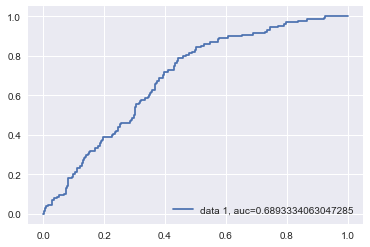

In [215]:
# roc
from sklearn import metrics

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
